In [10]:
import os, sys
from queue import Empty
import random
import matplotlib.pyplot as plt

sys.path.append(os.getenv("AURORA_REPOS"))

from flagships.post_processing.GenerateColumns import get_full_file_path
from flagships.post_processing.ParseFlagshipsFile import FlagshipsParser
from flagships.post_processing.EquilibriumPlotting import PlotPsi5PctContours

psieq_soak = [0, 0.01, 0.02, 0.04, 0.08, 0.16, 0.32]
beta_pol1_setpoint = [0, 0.1, 0.2, 0.3]
psieq_dc = [0, -0.01, -0.014, -0.021, -0.032, -0.048, -0.072, -0.108, -0.162, -0.243]
NevinsA = [-1, -0.5, 0, 0.5, 1, 2, 3]
NevinsC = [0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7]
NevinsN = [4, 12, 25, 99]
CurrentRatio = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3, 4, 5]

file_location = 'Flagships/pi3b/v25/pfc17500/2022-05-27/equil'

table_axes = {'psieq_soak': psieq_soak, 'beta_pol1_setpoint': beta_pol1_setpoint, 'psieq_dc': psieq_dc, 'NevinsA': NevinsA,
              'NevinsC': NevinsC, 'NevinsN': NevinsN, 'Ipl_setpoint': CurrentRatio}

axes_names = ['psieq_soak', 'beta_pol1_setpoint', 'NevinsA', 'NevinsC', 'NevinsN', 'psieq_dc', 'Ipl_setpoint']


suffix = "." + os.path.normpath(file_location).split(os.sep)[-2]
prefix = ""
lut_root = os.path.normpath(os.getenv('FS_ARCHIVE_ROOT') + os.path.sep + file_location)

def plotPsiContoursForProfile():

    search_axis_name = axes_names[random.randint(0, len(axes_names)-1)]
    search_axis_values = table_axes[search_axis_name]
    
    table_params = {}

    for search_axis in axes_names:
        table_params[search_axis] = table_axes[search_axis][random.randint(0, len(table_axes[search_axis])-1)]

    suffix = "." + os.path.normpath(file_location).split(os.sep)[-2]
    prefix = ""
    lut_root = os.path.normpath(os.getenv('FS_ARCHIVE_ROOT') + os.path.sep + file_location)
    filepath = get_full_file_path(lut_root=lut_root, prefix=prefix, suffix=suffix,
            soak = table_params['psieq_soak'], beta=table_params['beta_pol1_setpoint'], dc=table_params['psieq_dc'], NevinsC=table_params['NevinsC'], 
            NevinsAB=table_params['NevinsA'], NevinsN=table_params['NevinsN'], current_ratio=table_params['Ipl_setpoint'])
    filepath = filepath.replace('\\', os.path.sep)
    if(not os.path.exists(filepath)):
        filepath = filepath[:filepath.find('ab', filepath.find('equil'))+3] + filepath[filepath.find('ab', filepath.find('equil'))+4:]
    if(not os.path.exists(filepath)):
        filepath = filepath[:filepath.rfind('ab')+3] + filepath[filepath.rfind('ab')+4:]
    if(not os.path.exists(filepath)):
        # print('Not found: ', filepath)
        return plotPsiContoursForProfile()

    parser = FlagshipsParser(filepath, filepath)
    plt.scatter(parser.GetScalar('xpoint_r'), parser.GetScalar('xpoint_z'), marker='x') #TODO add this as a function to EquilmPlotting.py, but points dont look right
    PlotPsi5PctContours(parser)
    return filepath

def showGridOfContours(abnormal_contours):
    while(True):
        rows = 2
        cols = 4
        fig = plt.figure(figsize=(14, 8))
        filenames = [0]*rows*cols
        for i in range(rows):
            for j in range(cols):
                plt.subplot(rows, cols, (j+1) + i*cols)
                filename = plotPsiContoursForProfile()
                plt.title((j+1) + i*cols)
                filenames[(j+1) + i*cols - 1] = filename

        # print(filenames)
        plt.show()
        in_keys = input('')
        if(in_keys == 'end'):
            break
        if(in_keys == ''):
            continue
        for el in in_keys.split(','):
            abnormal_contours.append(filenames[int(el)-1])
        

In [ ]:
for abnormal_contour in abnormal_contours:
    print(abnormal_contour)
    parser = FlagshipsParser(abnormal_contour, abnormal_contour)
    PlotPsi5PctContours(parser)
    plt.show()


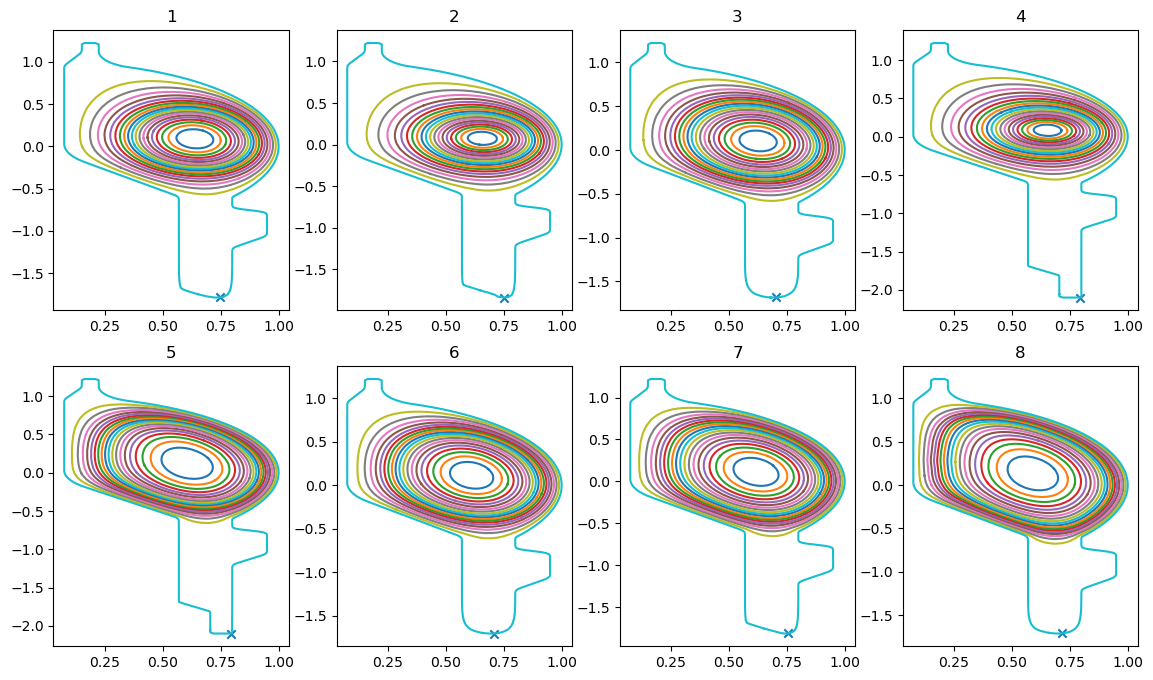

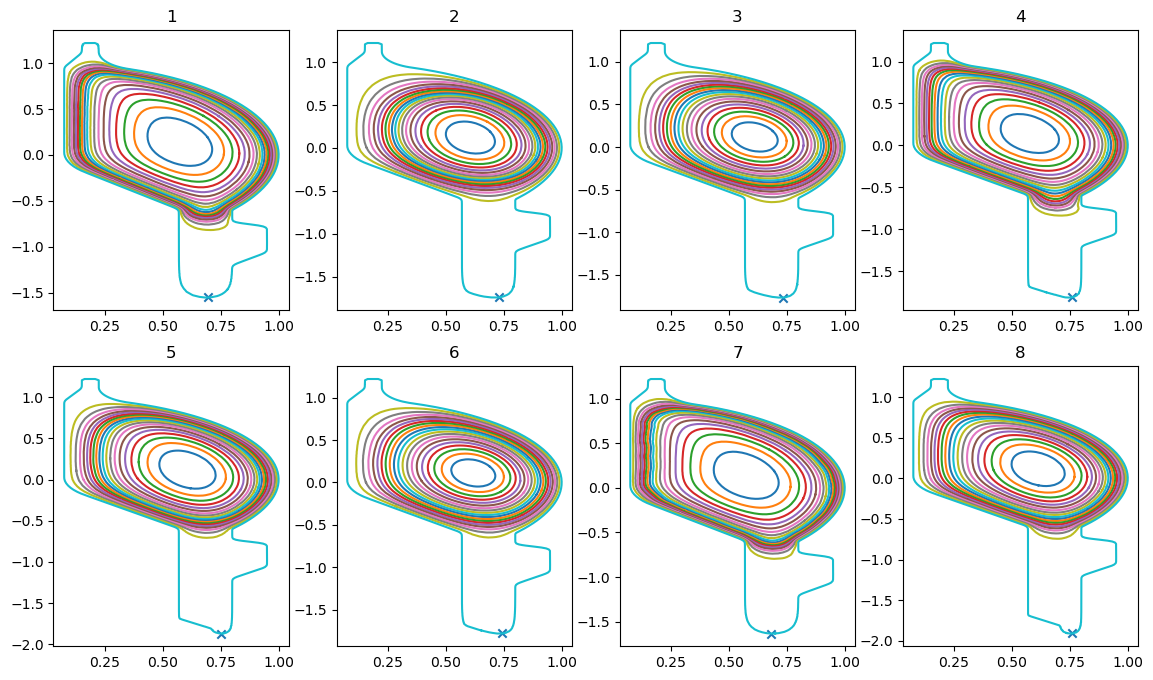

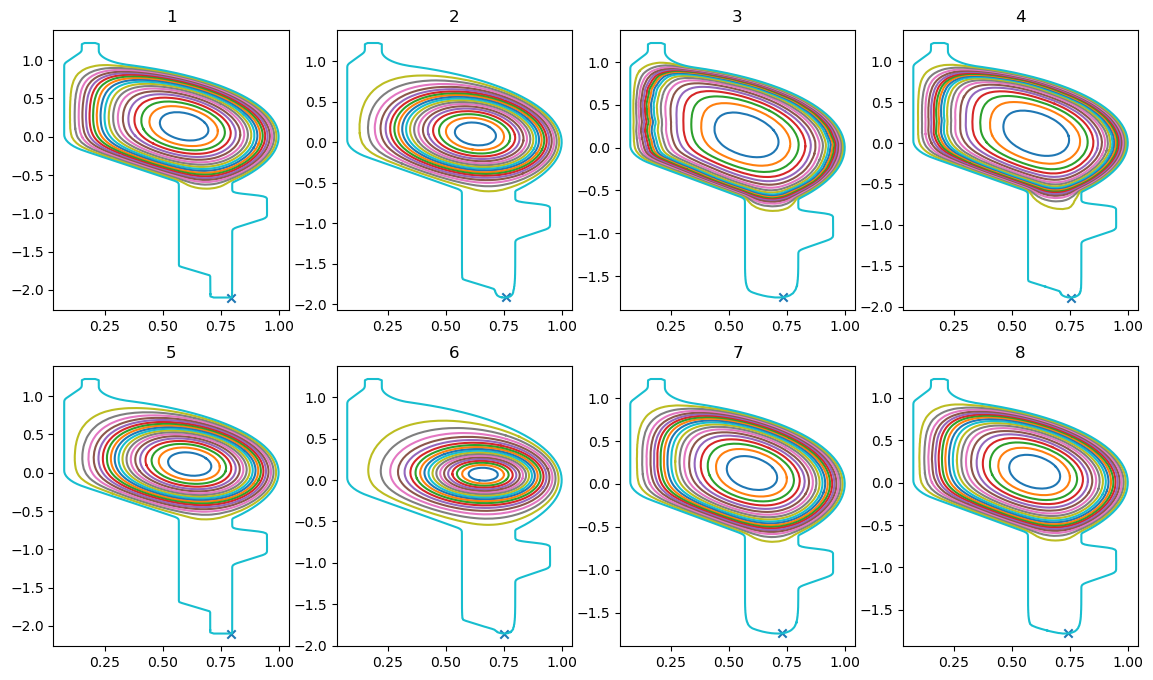

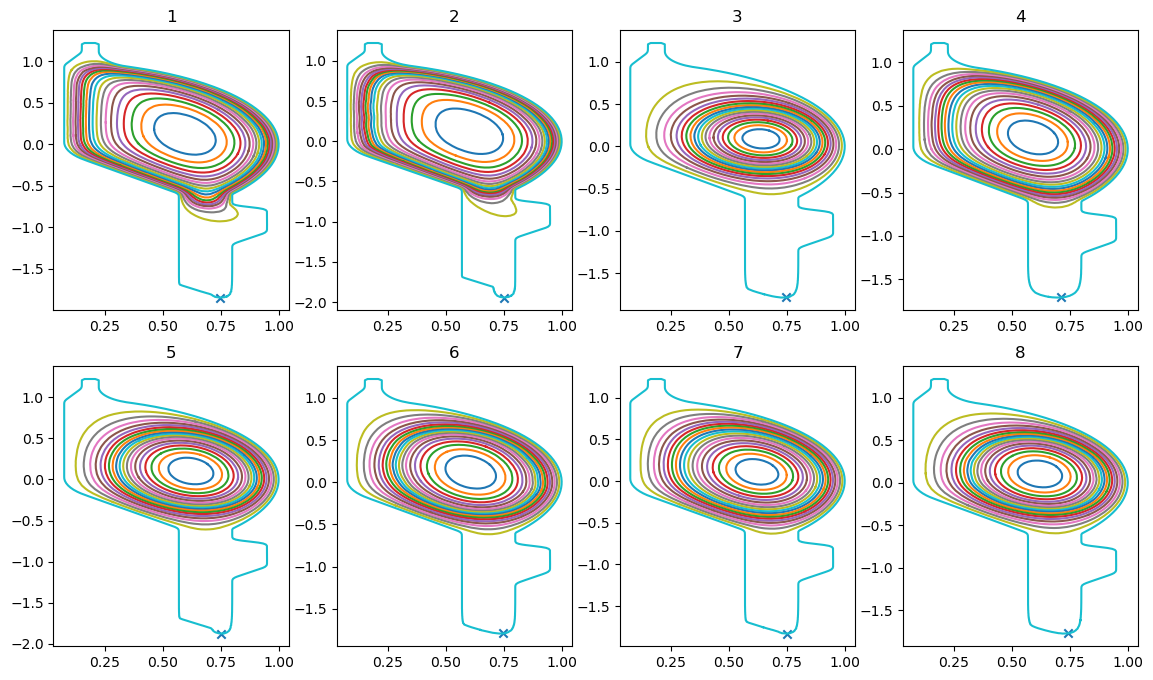

['/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.20_dc+000/ab+2.0_c0.54_n99/s000_bp0.20_dc+000_ab+2.0_c0.54_n99_i01.20.2022-05-27.hdf5', '/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.00_dc+000/ab+2.0_c0.56_n99/s000_bp0.00_dc+000_ab+2.0_c0.56_n99_i01.40.2022-05-27.hdf5', '/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.30_dc+000/ab+2.0_c0.46_n12/s000_bp0.30_dc+000_ab+2.0_c0.46_n12_i00.70.2022-05-27.hdf5', '/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.10_dc+000/ab+3.0_c0.50_n12/s000_bp0.10_dc+000_ab+3.0_c0.50_n12_i00.10.2022-05-27.hdf5', '/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.20_dc+000/ab+3.0_c0.48_n12/s000_bp0.20_dc+000_ab+3.0_c0.48_n12_i01.40.2022-05-27.hdf5', '/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.00_dc+000/ab+3.0_c0.56_n99/s000_bp0.00_dc+000_ab+3.0_c0.56_n99_i05.00.2022-05-27.hdf5', '/mnt/lut/Flagships/pi3b/v25/pfc17500/2022-05-27/equil/s000_bp0.30_dc+000/ab+2.0_c0.50_

In [21]:
showGridOfContours(abnormal_contours=abnormal_contours)
print(abnormal_contours)